# THE SPARKS FOUNDATION

# TASK 1 - Prediction using Supervised ML

To Predict the percentage of marks of the students based on the number of hours they studied

**Author :KUMMITI GANGADHAR NAIDU**

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Reading the Data
data=pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.isnull==True # Check if there any null value in the Dataset

False

Data Visulaization

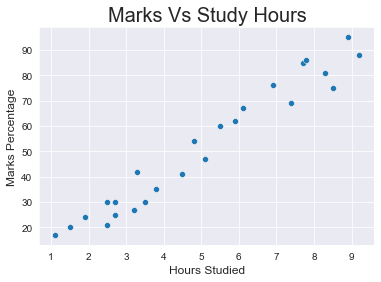

In [5]:
sns.set_style('darkgrid')
sns.scatterplot(x= data['Hours'], y= data['Scores'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

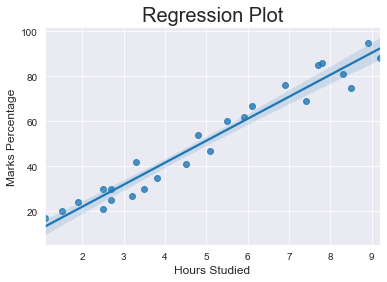

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

**Training the Model**

In [7]:
#splitting data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [8]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [11]:
#Fitting the Data into the model
regression = LinearRegression()
regression.fit(X_train, y_train)
print("-0-------Model Trained-------0-")

-0-------Model Trained-------0-


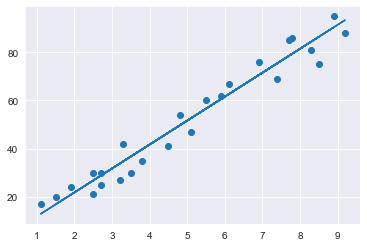

In [12]:
line = regression.coef_*X+regression.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [13]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [14]:
#Predicting the Percentage of Marks
y_pred = regression.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in y_pred]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [15]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [16]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.130879918502482


In [17]:
#What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


Thank you